<a href="https://colab.research.google.com/github/JoaquimTarin/Thesis-ML-Statistical-Physics/blob/main/KerasIsingPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
url = 'https://raw.githubusercontent.com/JoaquimTarin/Thesis-ML-Statistical-Physics/main/IsingData.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df

,Temperature,Energy,Magnetization,SpecificHeat,Susceptibility,0,1,2,3,4,...,246,247,248,249,250,251,252,253,254,255
0,2.888039,-0.435158,0.037811,0.104703,5.235309,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.986648,-0.878784,-0.915916,0.159377,0.290969,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2.521564,-0.551018,0.002762,0.226436,17.251840,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
3,2.764644,-0.470016,-0.063545,0.135943,6.287566,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
4,1.553310,-0.969658,0.982880,0.065665,0.040379,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2.988467,-0.411720,-0.018311,0.097610,4.011705,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
223,2.682799,-0.488815,0.129028,0.169025,7.063816,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
224,1.330949,-0.987717,-0.993172,0.031808,0.015371,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
225,3.652563,-0.312614,0.002235,0.058276,1.646363,1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0


In [3]:
train_ds = df.sample(frac=0.8, random_state=0)
test_ds = df.drop(train_ds.index)

In [8]:
train_features = train_ds.copy()
test_features = test_ds.copy()
'''
train_labels = train_features.drop(['Temperature','Energy', 'Magnetization','SpecificHeat','Susceptibility'], axis=1)
test_labels = test_features.drop(['Temperature','Energy', 'Magnetization','SpecificHeat','Susceptibility'], axis=1)

print(train_labels)
'''
train_labels = train_features.pop('Temperature')
test_labels = test_features.pop('Temperature')

print(train_features)

       Energy  Magnetization  SpecificHeat  Susceptibility    0    1    2  \
130 -0.934952      -0.960587      0.096010        0.089811 -1.0 -1.0 -1.0   
83  -0.991615      -0.995590      0.021241        0.008003 -1.0 -1.0 -1.0   
158 -0.972366       0.984550      0.053213        0.032479  1.0  1.0  1.0   
184 -0.764641      -0.784325      0.328407        2.459115  1.0  1.0  1.0   
76  -0.533287       0.057869      0.195567       13.022727 -1.0  1.0  1.0   
..        ...            ...           ...             ...  ...  ...  ...   
28  -0.440086       0.028824      0.130715        5.787504 -1.0 -1.0 -1.0   
114 -0.378014      -0.003273      0.091022        2.868935  1.0 -1.0 -1.0   
163 -0.953110      -0.973198      0.070222        0.048377 -1.0 -1.0 -1.0   
151 -0.920486       0.950775      0.132763        0.144393  1.0  1.0  1.0   
31  -0.876793       0.913284      0.186307        0.414347  1.0  1.0  1.0   

       3    4    5  ...  246  247  248  249  250  251  252  253  254  255  

In [6]:
normalizer = tf.keras.layers.Normalization(input_shape = [1,], axis=-1)
normalizer.adapt(np.array(train_features))

In [4]:
def model_builder(normalizer):
  model = tf.keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                #loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
                loss='mean_absolute_error'
                )

  return model

In [8]:
ising_model = model_builder(normalizer)

In [ ]:
%%time
history = ising_model.fit(
    train_features['Magnetization'], train_labels,
    validation_split=0.2, verbose=2, epochs=1000)

Epoch 1/1000
5/5 - 5s - loss: 1.8121 - val_loss: 1.0806 - 5s/epoch - 991ms/step
Epoch 2/1000
5/5 - 0s - loss: 1.2667 - val_loss: 1.0831 - 251ms/epoch - 50ms/step
Epoch 3/1000
5/5 - 0s - loss: 1.1305 - val_loss: 0.9193 - 232ms/epoch - 46ms/step
Epoch 4/1000
5/5 - 0s - loss: 1.0511 - val_loss: 0.8810 - 237ms/epoch - 47ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.9519 - val_loss: 0.8051 - 253ms/epoch - 51ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.8554 - val_loss: 0.6960 - 73ms/epoch - 15ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.7324 - val_loss: 0.6513 - 93ms/epoch - 19ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.6195 - val_loss: 0.4905 - 82ms/epoch - 16ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.4722 - val_loss: 0.3387 - 86ms/epoch - 17ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.3395 - val_loss: 0.3668 - 72ms/epoch - 14ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.2849 - val_loss: 0.2391 - 117ms/epoch - 23ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.2609 - val_loss: 0.2613 - 75ms/epoch - 15ms/step
Epoch 13/1000
5/5 - 0

In [5]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.plot(history.history['binary_crossentropy'], label='ce')
  #plt.plot(history.history['val_binary_crossentropy'], label='vce')
  plt.xlabel('Epoch')
  plt.ylabel('Error (T)')
  plt.legend()
  #plt.xscale('log')
  plt.grid(True)
  plt.title('Epoch evolution of loss')

#plot_loss(history)

Unfortunately, the model overfits on the training data, as seen by evaluating it on both the test and training subsets:

In [ ]:
ising_model.evaluate(test_features['Magnetization'], test_labels, verbose=2)

2/2 - 0s - loss: 0.1767 - 245ms/epoch - 123ms/step


0.17670173943042755

In [ ]:
ising_model.evaluate(train_features['Magnetization'], train_labels, verbose=2)

6/6 - 0s - loss: 0.1887 - 134ms/epoch - 22ms/step


0.18866509199142456

In [ ]:
def plot_magnetization(x,y):
  plt.scatter(train_labels, train_features['Magnetization'], label='Data')
  plt.plot(x,y, color='k', label='Predictions')
  plt.xlabel('M')
  plt.ylabel('T')
  plt.legend()

In [ ]:
x = np.linspace(-1.5,1.5,100)
y = ising_model.predict(x)
y = y.flatten()

4/4 [==============================] - 0s 6ms/step


In [ ]:
train_features.shape

(192,)

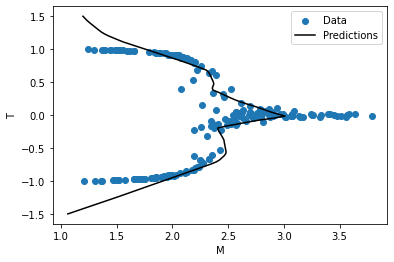

In [ ]:
plot_magnetization(y,x)

In [9]:

train_features_full = train_features.drop(['Energy', 'Magnetization','SpecificHeat','Susceptibility'], axis=1)
test_features_full = test_features.drop(['Energy', 'Magnetization','SpecificHeat','Susceptibility'], axis=1)
'''

train_features_full = train_features.copy()
test_features_full = test_features.copy()
'''
train_features_full

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
130,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
83,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
158,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
184,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
76,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
114,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
163,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
151,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
normalizer_full = tf.keras.layers.Normalization(input_shape = [256,], axis=-1)
normalizer_full.adapt(np.array(train_features_full))

ising_model_full = model_builder(normalizer_full)

In [11]:
%%time
history_full = ising_model_full.fit(
    train_features_full, train_labels,
    validation_split=0.2, verbose=2, epochs=200)

Epoch 1/200
5/5 - 1s - loss: 1.3285 - val_loss: 1.0374 - 968ms/epoch - 194ms/step
Epoch 2/200
5/5 - 0s - loss: 0.8828 - val_loss: 0.7847 - 40ms/epoch - 8ms/step
Epoch 3/200
5/5 - 0s - loss: 0.5567 - val_loss: 0.6148 - 39ms/epoch - 8ms/step
Epoch 4/200
5/5 - 0s - loss: 0.4087 - val_loss: 0.5348 - 43ms/epoch - 9ms/step
Epoch 5/200
5/5 - 0s - loss: 0.3208 - val_loss: 0.4625 - 60ms/epoch - 12ms/step
Epoch 6/200
5/5 - 0s - loss: 0.2865 - val_loss: 0.4790 - 67ms/epoch - 13ms/step
Epoch 7/200
5/5 - 0s - loss: 0.2026 - val_loss: 0.5263 - 50ms/epoch - 10ms/step
Epoch 8/200
5/5 - 0s - loss: 0.1976 - val_loss: 0.5357 - 60ms/epoch - 12ms/step
Epoch 9/200
5/5 - 0s - loss: 0.1722 - val_loss: 0.5146 - 40ms/epoch - 8ms/step
Epoch 10/200
5/5 - 0s - loss: 0.1519 - val_loss: 0.5023 - 43ms/epoch - 9ms/step
Epoch 11/200
5/5 - 0s - loss: 0.1464 - val_loss: 0.4553 - 38ms/epoch - 8ms/step
Epoch 12/200
5/5 - 0s - loss: 0.1586 - val_loss: 0.4985 - 46ms/epoch - 9ms/step
Epoch 13/200
5/5 - 0s - loss: 0.1241 - val

In [15]:
ising_model_full.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 256)              513       
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,186
Trainable params: 20,673
Non-trainable params: 513
_________________________________________________________________


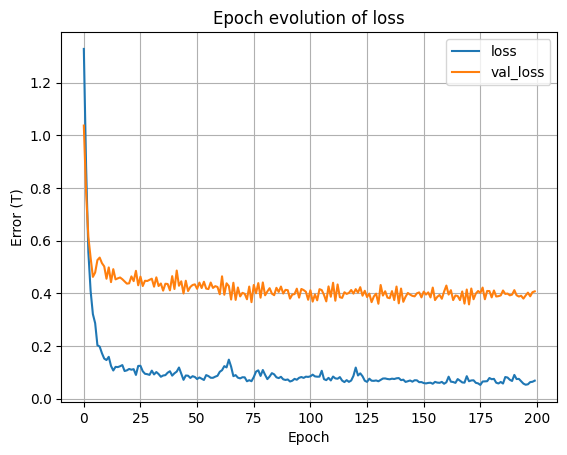

In [12]:
plot_loss(history_full)

In [13]:
ising_model_full.evaluate(test_features_full, test_labels, verbose=2)

2/2 - 0s - loss: 0.3654 - 22ms/epoch - 11ms/step


0.3653908669948578

In [14]:
ising_model_full.evaluate(train_features_full, train_labels, verbose=2)

6/6 - 0s - loss: 0.1411 - 24ms/epoch - 4ms/step


0.141114741563797

Let us try changing the model into a more complex NN: it is not unreasonable to believe that it's overfitting may be a result from not enough parameters being available to understand the true complexity of the data. 

The alternative would be that the nature of this problem - the transition between the paramagnetic and ferromagnetic phase being so sudden - doesn't lean very well to being analyzed by an algorithm of this kind; but I digress.

In [ ]:
def model_builder(normalizer):
  model = tf.keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_absolute_error')

  return model

In [ ]:
history = ising_model.fit(
    train_features, train_labels,
    validation_split=0.2, verbose=0, epochs=200)

In [ ]:
ising_model.evaluate(train_features, train_labels, verbose=2)

6/6 - 0s - loss: 0.4185 - 33ms/epoch - 5ms/step


0.4184933602809906

In [ ]:
ising_model.evaluate(test_features, test_labels, verbose=2)

2/2 - 0s - loss: 0.5405 - 26ms/epoch - 13ms/step


0.5404693484306335

Nope, that wasn't it - that, or I didn't adjust the model properly. Maybe we can try plotting data and see whether the overfitting is that big of a deal.